In [1]:
# Keras, dataset, and VGG19 imports
import keras
from keras.datasets import cifar100
from keras.applications import VGG19

In [2]:
# Loading VGG19 with imagenet weights
from keras.layers import Input

vgg19_model = VGG19(include_top = True, weights='imagenet')
vgg19_model.summary()

574710816/574710816 [==============================] - 8s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

# define new empty model
model = Sequential()

# add all layers except output from VGG19 to new model
for layer in vgg19_model.layers[:-1]:
  model.add(layer)

# freeze all weights
for layer in model.layers:
  layer.trainable = False

# add dropout layer and new output layer
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [4]:
# load dataset
(x_train, y_train) , (x_val, y_val) = cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [5]:
import numpy as np
import cv2

In [6]:
import matplotlib.pyplot as plt

NUM_CLASSES = 100

# Onehot encode labels

y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [8]:
# returns batch_size random samples from either training set or validation set
# resizes each image to (224, 244, 3), the native input size for VGG19
def getBatch(batch_size, train_or_val='train'):
  x_batch = []
  y_batch = []
  if train_or_val == 'train':
    idx = np.random.randint(0, len(x_train), (batch_size))

    for i in idx:
      img = cv2.resize(x_train[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_train[i])
  elif train_or_val == 'val':
    idx = np.random.randint(0, len(x_val), (batch_size))

    for i in idx:
      img = cv2.resize(x_val[i], (224, 224), interpolation=cv2.INTER_CUBIC)
      x_batch.append(img)
      y_batch.append(y_val[i])
  else:
    print("error, please specify train or val")

  x_batch = np.array(x_batch)
  y_batch = np.array(y_batch)
  return x_batch, y_batch


In [9]:
EPOCHS = 10
BATCH_SIZE = 128
VAL_SIZE = 500
STEPS = 50


for e in range(EPOCHS):
  train_loss = 0
  train_acc = 0

  for s in range(STEPS):
    x_batch, y_batch = getBatch(BATCH_SIZE, "train")
    out = model.train_on_batch(x_batch, y_batch)
    train_loss += out[0]
    train_acc += out[1]

  print(f"Epoch: {e}\nTraining Loss = {train_loss / STEPS}\tTraining Acc = {train_acc / STEPS}")

  x_v, y_v = getBatch(VAL_SIZE, "val")
  eval = model.evaluate(x_v, y_v)
  print(f"Validation loss: {eval[0]}\tValidation Acc: {eval[1]}\n")




Epoch: 0
Training Loss = 4.357551097869873	Training Acc = 0.19078125
16/16 [==============================] - 14s 467ms/step - loss: 2.3952 - categorical_accuracy: 0.3660
Validation loss: 2.395190715789795	Validation Acc: 0.3659999966621399

Epoch: 1
Training Loss = 3.0525686311721802	Training Acc = 0.33515625
16/16 [==============================] - 2s 154ms/step - loss: 2.1015 - categorical_accuracy: 0.4540
Validation loss: 2.101477861404419	Validation Acc: 0.45399999618530273

Epoch: 2
Training Loss = 2.652060112953186	Training Acc = 0.40109375
16/16 [==============================] - 3s 158ms/step - loss: 2.0420 - categorical_accuracy: 0.4920
Validation loss: 2.04197359085083	Validation Acc: 0.492000013589859

Epoch: 3
Training Loss = 2.4753671884536743	Training Acc = 0.4415625
16/16 [==============================] - 2s 154ms/step - loss: 2.0392 - categorical_accuracy: 0.4800
Validation loss: 2.0392024517059326	Validation Acc: 0.47999998927116394

Epoch: 4
Training Loss = 2.477519

In [10]:
x_v, y_v = getBatch(VAL_SIZE, "val")
eval1 = model.evaluate(x_v, y_v)
print(f"Validation loss: {eval1[0]}\tValidation Acc: {eval1[1]}\n")

16/16 [==============================] - 2s 149ms/step - loss: 1.9950 - categorical_accuracy: 0.5220
Validation loss: 1.9949778318405151	Validation Acc: 0.5220000147819519



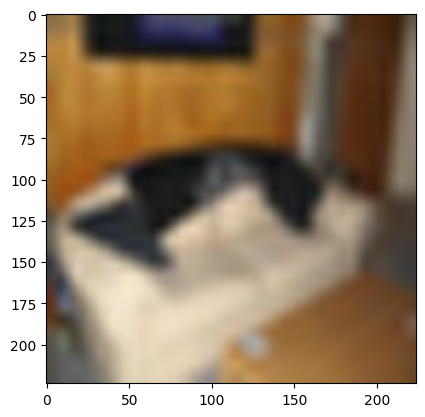

1/1 [==============================] - 1s 1s/step
pred: bed
acct: couch


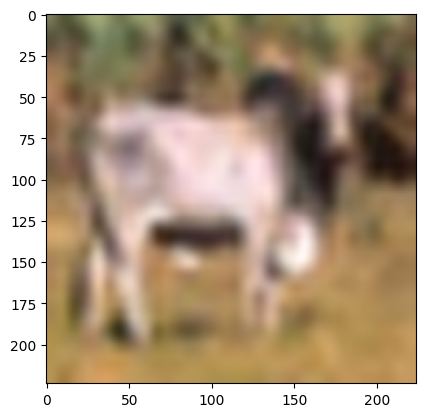

1/1 [==============================] - 0s 18ms/step
pred: cattle
acct: cattle


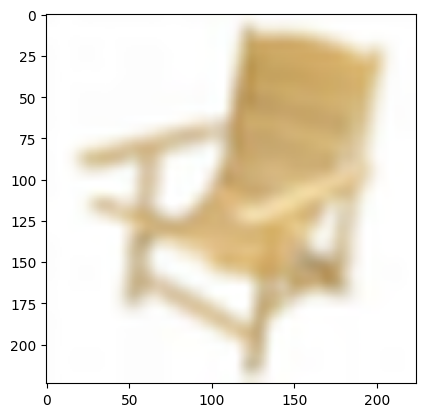

1/1 [==============================] - 0s 19ms/step
pred: chair
acct: chair


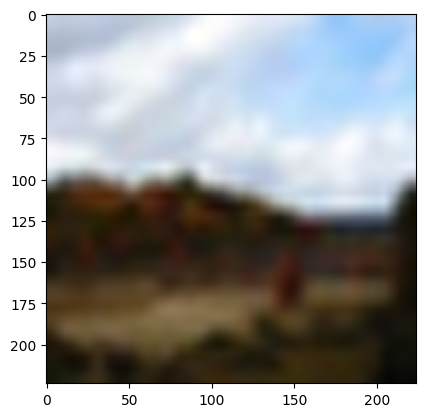

1/1 [==============================] - 0s 18ms/step
pred: cloud
acct: plain


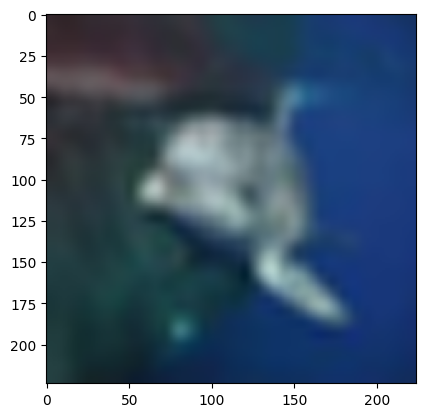

1/1 [==============================] - 0s 17ms/step
pred: crocodile
acct: whale


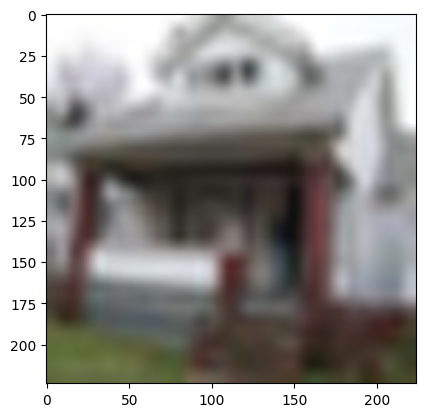

1/1 [==============================] - 0s 19ms/step
pred: house
acct: house


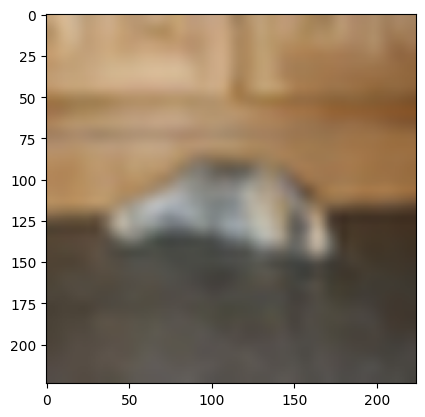

1/1 [==============================] - 0s 17ms/step
pred: otter
acct: rabbit


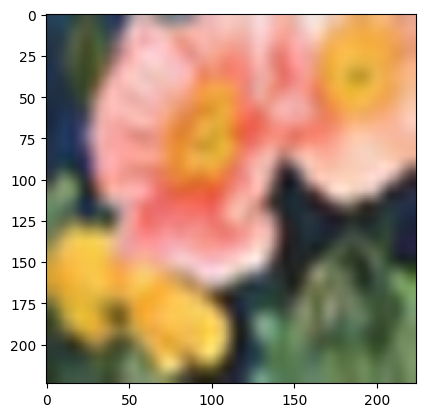

1/1 [==============================] - 0s 19ms/step
pred: rose
acct: poppy


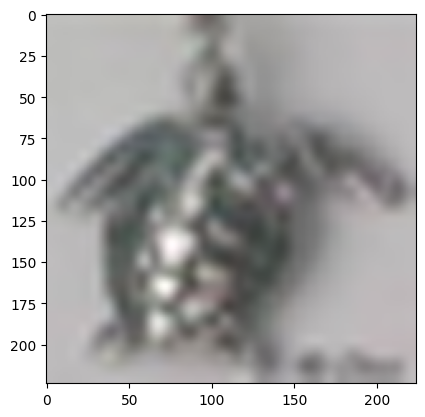

1/1 [==============================] - 0s 18ms/step
pred: flatfish
acct: turtle


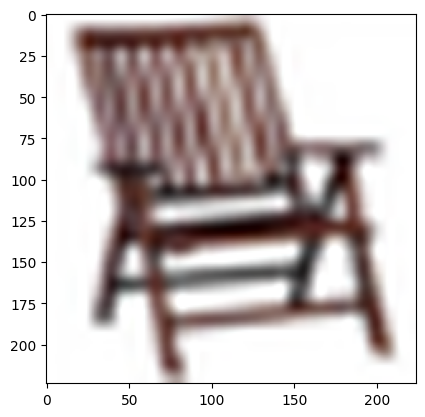

1/1 [==============================] - 0s 18ms/step
pred: chair
acct: chair


In [11]:
# Sample outputs from validation set
CATEGORIES = [
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
]

import matplotlib.pyplot as plt

x_v, y_v = getBatch(10, "val")

for i in range(10):

  import numpy as np
  plt.imshow(x_v[i])
  plt.show()
  print("pred: " +  CATEGORIES[np.argmax(model.predict(x_v[i:i+1]))])
  print("acct: " + CATEGORIES[np.argmax(y_v[i])])



